# Convolutaional Neural Networks (CNNs)
<hr>

Convolutional Neural Networks (CNNs or ConvNets) are specialized neural architectures that are predominantly used for several computer vision tasks, such as image classification and object recognition. These neural networks harness the power of Linear Algebra, specifically through convolution operations, to identify patterns within images.

Convolutional neural networks have three main kinds of layers, which are:
- Convolutional layer
- Pooling layer
- Fully-connected layer

The convolutional layer is the first layer of the network, while the fully-connected layer is the final layer, responsible for the output. The first convolutional layer may be followed by several additional convolutional layers or pooling layers; and with each new layer, the more complex is the CNN.

As the CNN gets more complex, the more it excels in identifying greater portions of the image. Whereas earlier layers focus on the simple features, such as colors and edges; as the image progresses through the network, the CNN starts to recognize larger elements and shapes, until finally reaching its main goal.

The image below displays the structure of a CNN. We have an input image, followed by Convolutional and Pooling layers, where the feature learning process happens. Later on, we have the layers responsible for the task of classifying whether the vehicle in the input data is a car, truck, van, bicycle, etc.

<br>

<div style="text-align:center">
    <img src="media/cnn.png" width=800>
</div>

Notice that CNNs operate on volumes.
- Layers aren't vectors but have spatial dimensions: width, height, depth.
- A CNN is composed of a sequence of convolution and pool layers mixed with activation functions.

<hr>

- **Input Volume**: The input volume is the image that we want to classify. It is a 3D array of size $W \times H \times D$, where $W$ is the width, $H$ is the height, and $D$ is the depth.

<hr>

- **Filters**: A filter is a 3D array of size $F_w \times F_h \times F_d$ where $F_w, F_h, F_d$ are the width, height and depth of the filter, respectively. The depth of the filter must be the same as the depth of the input volume. A filter is also called a kernel.
    - Filters are smaller in width and height than the input volume, but have the same depth.
    - Filters slide (or convolve) across the width and height of the input volume.
    - The convolution operation is element-wise multiplication of the filter and the input volume, then summing up the results into a single number.
    - The output of the convolution operation is a 2D array called the **activation map**.
    - For example, if the input volume is $32 \times 32 \times 3$ and the filter is $5 \times 5 \times 3$, then the output activation map will be $28 \times 28 \times 1$. If we use $10$ filters, then the output will be $28 \times 28 \times 10$ ($10$ activation maps stacked on top of each other).

<div style="align:center">
    <img src="media/mapping.gif" width="600">
</div>

<hr>

- **Activation Function**: The activation function is applied to the activation map. It is usually a non-linear function such as ReLU.

<hr>

- **Activation Map**: The activation map is the output of the activation function. It is a 2D array of size:<br> [activation_map_width $\times$ activation_map_height $\times$ 1]
    - The size of the activation map is calculated as follows:
        - (input_volume_width - filter_width + 1) $\times$ (input_volume_height - filter_height + 1) $\times$ 1
        - $Size = (W - F + 1) \times (H - F + 1) \times 1$
    - The depth of the activation map is always 1.

<hr>

- **Multiple Convolutional Layers**: A CNN usually has multiple convolutional layers. The output of one convolutional layer is the input of the next convolutional layer.

## Edge Detection
<hr>

Edge detection in images is a critical process in computer vision and image processing. It assists in identifying significant variations in the image, which often correspond to the edges of objects within the image. There are different methods for detecting edges, but two of the most common are vertical and horizontal edge detection.

### Vertical Edge Detection
For detecting vertical edges in an image, we use a kernel that highlights vertical changes in intensity. A commonly used kernel for this purpose is a **Sobel** filter. The intuition behind this kernel is to emphasize areas where there's a significant horizontal gradient (change in intensity) while minimizing the impact of vertical gradients.

A typical vertical edge detection filter looks like this:

$$
\text{Vertical Filter} = \begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}
$$

The **Sobel** filter is a variation as:

$$
\text{Sobel Filter} = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$$

The **Scharr** filter focuses more on the center of the grid:

$$
\text{Scharr Filter} = \begin{bmatrix}
-3 & 0 & 3 \\
-10 & 0 & 10 \\
-3 & 0 & 3
\end{bmatrix}
$$

These filters have negative values on the left, positive values on the right, and zeros in the middle column. When such a filter is applied to an image using a convolution operation, it effectively highlights regions where a significant transition from dark to light (or vice versa) occurs horizontally, corresponding to vertical edges.

### Horizontal Edge Detection
For detecting horizontal edges, we use a similar approach but with the orientation of the kernel flipped (left to right, and top to bottom). The kernel is designed to highlight significant vertical changes in intensity while downplaying horizontal gradients.

A typical horizontal edge detection filter is (90 degree flip of the vertical filter):

$$
\text{Horizontal Filter} = \begin{bmatrix}
1 & 0 & 1 \\
0 & 0 & 0 \\
-1 & 0 & -1
\end{bmatrix}
$$

This filter has positive values at the top, negative values at the bottom, and zeros in the middle row. When convolved with an image, it accentuates areas where there is a significant change in intensity vertically, revealing horizontal edges.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

def apply_filter(image, kernel):
    return cv2.filter2D(image, -1, kernel)

def visualize_edges(image_path):
    image = load_image(image_path)

    # define vertical and horizontal edge detection filters
    vertical_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    horizontal_filter = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    # apply filters
    vertical_edges = apply_filter(image, vertical_filter)
    horizontal_edges = apply_filter(image, horizontal_filter)

    # display results
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 3, 2)
    plt.imshow(vertical_edges, cmap='gray')
    plt.title('Vertical Edges')
    plt.subplot(1, 3, 3)
    plt.imshow(horizontal_edges, cmap='gray')
    plt.title('Horizontal Edges')
    plt.show()

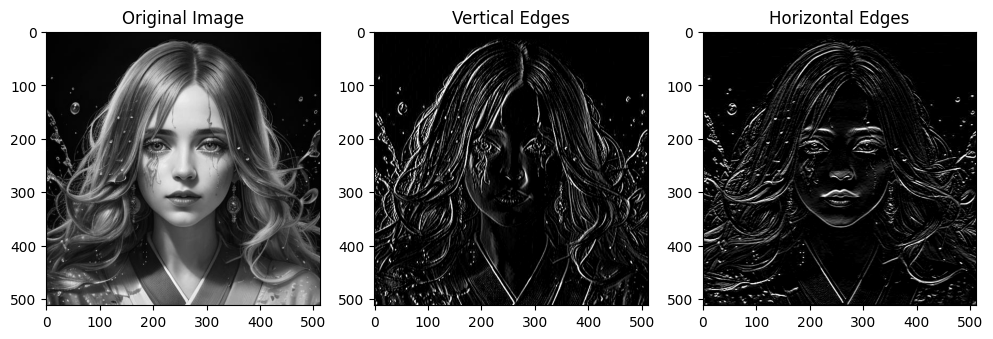

In [5]:
visualize_edges('media/image.png')

<br>

<hr>

- **Stride**: The stride is the number of pixels by which the filter slides across the input volume. The default stride is 1.
    - It determines the size of the output activation map.
    - The output dimension is calculated as follows:
        - $Dimension = \frac{N - F}{S} + 1$
    - For example, for an input size of $7 \times 7 \times 3$, a filter size of $3 \times 3 \times 3$:
        - Stride $S = 1$: Output size is $5 \times 5 \times 1$.
        - Stride $S = 2$: Output size is $3 \times 3 \times 1$.
        - Stride $S = 3$: Output size is $2.33$? (does not fit properly).

<hr>

- **Padding**: Padding is the number of pixels that are added to the input volume to make sure that the filter fits properly. The default padding is 0.
    - Adding zeros around the border of the input volume.
    - Helps control the spatial size of the output volume.
    - The output dimension is calculated as follows:
        - $Padding = \frac{F - 1}{2}$
    - Given a $7 \times 7 \times 3$ input volume and a $3 \times 3 \times 3$ filter:
        - Padding $P = 0$: Output size is $5 \times 5 \times 1$.
        - Padding $P = 1$: Output size is $7 \times 7 \times 1$.

<hr>

- Setting the padding $p=0$ results in **valid convolutions**
- Setting the padding $p=k, k \in \mathbb{Z}$ such that the output volume maintains its dimensions results in **same convolutions**

<hr>

- **Common Practices:**
    - Conv layers often have stride = 1.
    - Filters are usually small: $3 \times 3$, $5 \times 5$, $7 \times 7$.
    - Padding is often used to preserve the spatial size of the input volume.
    - Without padding, the size of the output volume reduces after every convolution. Padding preserves the spatial dimensions.
    - In practice, it is common to zero pad the border. For filter size (F):
        - $3 \times 3$ → Padding of 1
        - $5 \times 5$ → Padding of 2
        - $7 \times 7$ → Padding of 3

<hr>

- **Example Calculation:**
    - Input volume: $32 \times 32 \times 3$
    - Filter size: $5 \times 5 \times 3$
    - Stride: $1$
    - Padding: $2$
    - Output volume:
        - $\frac{32 - 5 + 2(2)}{1} + 1 = 32$
        - $32 \times 32 \times 10$ (10 filters)
    - Parameters per filter: $5 \times 5 \times 3 + 1 = 76$
    - Total parameters: $76 \times 10 = 760$

<hr>

- **Conv Layer Summary:**
    - Input volume: $W_1 \times H_1 \times D_1$
    - Hyperparameters:
        - Filter size: $F$
        - Number of filters: $K$
        - Stride: $S$
        - Padding: $P$
    - Output volume: $W_2 \times H_2 \times D_2$ where:
    
    <hr>
    
        - $W_2 = H_2 = \frac{W_1 - F + 2P}{S} + 1$ (width and height are computed equally by symmetry)
        - $D_2 = K$
        
        For a layer $[l]$, the formula is given as:
        
        $$n_H^{[l]} = \left\lfloor \frac{n_H^{[l-1]} - f^{[l]} + 2p^{[l]}}{s^{[l]}} + 1 \right\rfloor$$

        The formula structure is the same for the width of layer $[l]$.
    
    <hr>
    - Number of parameters: $(F \times F \times D_1 + 1)  \times  K$
    - Common Settings:
        - $F = 3, S = 1, P = 1$
        - $F = 5, S = 1, P = 2$
        - $F = 1, S = 1, P = 0$

<hr>

- **Pooling Layer**: The pooling layer is used to reduce the spatial size of the input volume. It is usually used after a convolutional layer.
    - Aims to downsample the input volume, making the network more efficient and manageable.
    - Often used to reduce the size of the input volume and to control overfitting.
    - Operates on each activation map independently.

    - **Max Pooling**: The max pooling operation is applied to each activation map independently. It slides a window of size $F \times F$ across the activation map and outputs the maximum value in each window.
        - Input volume: $W_1 \times H_1 \times D_1$
        - Hyperparameters:
            - Spatial extent: $F$
            - Stride: $S$
        - Output volume:
            - $W_2 = \frac{W_1 - F}{S} + 1$
            - $H_2 = \frac{H_1 - F}{S} + 1$
            - $D_2 = D_1$
        - Parameters: $0$. Max pooling is a fixed function of the input. There are no parameters to learn.
        - Zero padding is not used in max pooling.
        - Common Settings:
            - $F = 2, S = 2$ (this is quite standard and reduces each spatial dimension by half) 
            - $F = 3, S = 2$

    - **Average Pooling**: The average pooling operation is applied to each activation map independently. It slides a window of size $F \times F$ across the activation map and outputs the average value in each window. It is not used very often.

<div style="align:center">
    <img src="media/pooling.png" width="400">
</div>

<hr>

- **Fully Connected Layer**: The fully connected layer is used to compute the class scores. It is usually the last layer in a CNN.

    - **Flattening**: The input to the fully connected layer is a 3D array. It needs to be converted to a 1D array. This process is called flattening.
        - Input volume: $W_1 \times H_1 \times D_1$
        - Output volume: $W_1 \times H_1 \times D_1$
        - Flattened volume: $W_1 \times H_1 \times D_1$
        - The flattened volume is the input to the fully connected layer.

    - **Fully Connected Layer**: The fully connected layer is a linear layer. It is used to compute the class scores. It is usually the last layer in a CNN.
        - Input volume: $W_1 \times H_1 \times D_1$
        - Output volume: $1 \times 1 \times K$
        - Parameters: $(W_1 \times H_1 \times D_1 + 1)  \times  K$
        - Common Settings:
            - $K = 10$ for CIFAR-10
            - $K = 1000$ for ImageNet

<hr>

## $ 1 \times 1$ Convolutions & Networks in Networks
<hr>

A $1 \times 1$ convolution, also known as a "Network in Network", is a powerful tool in CNN architectures. It operates on the channel level, mixing the channels to create new feature maps.

<div style="text-align:center">
    <img src="media/1by1.png" width=500>
    <caption><font color="red">$64 \times 64 \times 192$ input convolved with a single $1 \times 1 \times 192$ filter retains height and width, but reduces channels: $64 \times 64 \times 1$</font></caption>
</div>

In general, convolving with $1 \times 1 \times f$ where $f$ is the number of filters applied:

$$(n \times n \times n_c) * (1 \times 1 \times f) \rightarrow (n \times n \times f)$$

**Functionality:**
- Initially, it might seem like a $1 \times 1$ convolution simply multiplies each pixel by a number, but it actually does more.
- It can act as a fully connected layer applied to each pixel location, enabling it to learn more complex functions.

**Examples and Effects:**
- A $6 \times 6 \times 1$ input convolved with a $1 \times 1 \times 1$ filter produces a $6 \times 6 \times 1$ output, acting like a per-pixel transformation.
- A $6 \times 6 \times 32$ input with a $1 \times 1 \times 32$ convolution using 5 filters results in a $6 \times 6 \times 5$ output, effectively reducing the channel depth.

**Applications:**
- **Dimensionality Reduction:** Reduces the number of channels, leading to a lighter model and saving computational resources.